## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

作業1：試著調整 Decision Tree 中的參數，並觀察是否會改變結果？   
作業2：改用其他資料集 (diabetes, wine)，並與迴歸模型的結果進行比較

In [1]:
from sklearn.datasets import load_diabetes, load_wine
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
# 讀取 Boston 資料
diabetes = load_diabetes()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.1, random_state=4)

# 設定深度集合
maxDepthList = list(range(1, 51))

mseList = list()
for oneDepth in maxDepthList:
    # 建立一個決策樹迴歸模型
    regr = DecisionTreeRegressor(max_depth = oneDepth)
    
    # 將訓練資料丟進去模型訓練
    regr.fit(x_train, y_train)
    
    # 將測試資料丟進模型得到預測結果
    y_pred = regr.predict(x_test)

    # 計算均方誤差(MSE)
    print("Max Depth: {}, Mean squared error: {}".format(oneDepth, round(mean_squared_error(y_test, y_pred), 2)) )
    
    # 將 MSE 結果儲存起來
    mseList.append(mean_squared_error(y_test, y_pred))

Max Depth: 1, Mean squared error: 4316.99
Max Depth: 2, Mean squared error: 3124.94
Max Depth: 3, Mean squared error: 3538.64
Max Depth: 4, Mean squared error: 3950.28
Max Depth: 5, Mean squared error: 3879.65
Max Depth: 6, Mean squared error: 4686.05
Max Depth: 7, Mean squared error: 5551.3
Max Depth: 8, Mean squared error: 7065.66
Max Depth: 9, Mean squared error: 7586.19
Max Depth: 10, Mean squared error: 7861.68
Max Depth: 11, Mean squared error: 7868.93
Max Depth: 12, Mean squared error: 7841.91
Max Depth: 13, Mean squared error: 7821.33
Max Depth: 14, Mean squared error: 7425.75
Max Depth: 15, Mean squared error: 8288.55
Max Depth: 16, Mean squared error: 7487.61
Max Depth: 17, Mean squared error: 7393.43
Max Depth: 18, Mean squared error: 7750.02
Max Depth: 19, Mean squared error: 7858.22
Max Depth: 20, Mean squared error: 7444.0
Max Depth: 21, Mean squared error: 8251.53
Max Depth: 22, Mean squared error: 7846.16
Max Depth: 23, Mean squared error: 7985.16
Max Depth: 24, Mean sq

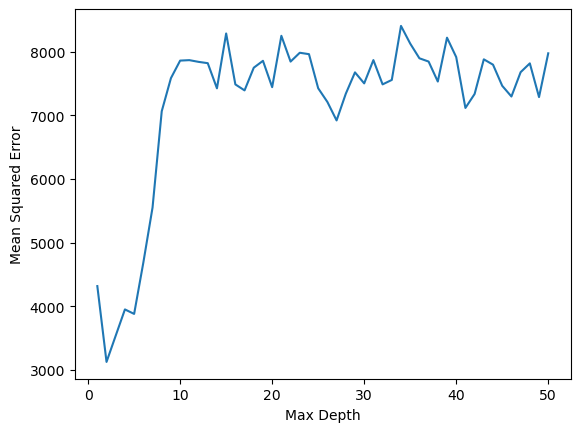

In [3]:
# 繪製折線圖探索出樹的深度與 MSE 之間的關係
# 從結果可知，過多的深度反而讓 MSE 提升，產生過擬合的現象
import matplotlib.pyplot as plt
plt.plot(maxDepthList, mseList)
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.show()

In [4]:
# 讀取 wine 資料
wine = load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.1, random_state=4)

# 設定深度集合
maxDepthList = list(range(1, 51))

accList = list()
for oneDepth in maxDepthList:
    # 建立一個決策樹分類模型
    regc = DecisionTreeClassifier(max_depth = oneDepth)
    
    # 將訓練資料丟進去模型訓練
    regc.fit(x_train, y_train)
    
    # 將測試資料丟進模型得到預測結果
    y_pred = regc.predict(x_test)

    # 計算準確度
    acc = accuracy_score(y_test, y_pred)
    print("Max Depth: {}, Accuracy: {}".format(oneDepth, round(acc, 2)) )

    # 將 MSE 結果儲存起來
    accList.append(acc)

Max Depth: 1, Accuracy: 0.67
Max Depth: 2, Accuracy: 0.89
Max Depth: 3, Accuracy: 0.94
Max Depth: 4, Accuracy: 1.0
Max Depth: 5, Accuracy: 0.89
Max Depth: 6, Accuracy: 1.0
Max Depth: 7, Accuracy: 1.0
Max Depth: 8, Accuracy: 1.0
Max Depth: 9, Accuracy: 0.89
Max Depth: 10, Accuracy: 1.0
Max Depth: 11, Accuracy: 0.94
Max Depth: 12, Accuracy: 0.94
Max Depth: 13, Accuracy: 0.89
Max Depth: 14, Accuracy: 0.83
Max Depth: 15, Accuracy: 0.94
Max Depth: 16, Accuracy: 0.89
Max Depth: 17, Accuracy: 0.94
Max Depth: 18, Accuracy: 0.94
Max Depth: 19, Accuracy: 0.94
Max Depth: 20, Accuracy: 1.0
Max Depth: 21, Accuracy: 1.0
Max Depth: 22, Accuracy: 0.94
Max Depth: 23, Accuracy: 0.94
Max Depth: 24, Accuracy: 0.94
Max Depth: 25, Accuracy: 0.94
Max Depth: 26, Accuracy: 1.0
Max Depth: 27, Accuracy: 1.0
Max Depth: 28, Accuracy: 0.89
Max Depth: 29, Accuracy: 0.94
Max Depth: 30, Accuracy: 0.89
Max Depth: 31, Accuracy: 1.0
Max Depth: 32, Accuracy: 0.89
Max Depth: 33, Accuracy: 1.0
Max Depth: 34, Accuracy: 0.94


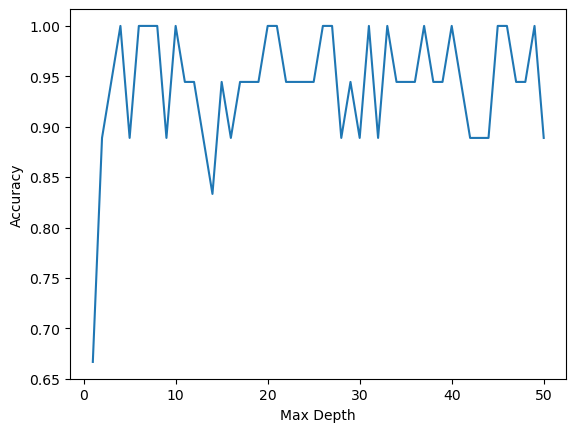

In [5]:
# 繪製折線圖探索出樹的深度與 Accuracy 之間的關係
# 從結果可知，當樹的深度達到第五層時，準確度就會趨於平穩的狀態，有時多預測對一筆，有時反而多錯一筆。
import matplotlib.pyplot as plt
plt.plot(maxDepthList, accList)
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()